In [1]:
import numpy as np
# Importing standard Qiskit libraries
from qiskit import QuantumCircuit, transpile, Aer, IBMQ
from qiskit.tools.jupyter import *
from qiskit.visualization import *
from ibm_quantum_widgets import *

# Loading your IBM Q account(s)
provider = IBMQ.load_account()

In [2]:
from qiskit.ml.datasets import ad_hoc_data, sample_ad_hoc_data
print(ad_hoc_data)


<function ad_hoc_data at 0x7f7eed4c1820>


/opt/conda/lib/python3.8/site-packages/qiskit/ml/__init__.py:40: DeprecationWarning: The package qiskit.ml is deprecated. It was moved/refactored to qiskit_machine_learning (pip install qiskit-machine-learning). For more information see <https://github.com/Qiskit/qiskit-aqua/blob/master/README.md#migration-guide>
  warn_package('ml', 'qiskit_machine_learning', 'qiskit-machine-learning')


/opt/conda/lib/python3.8/site-packages/qiskit/ml/datasets/ad_hoc.py:79: DeprecationWarning: The variable qiskit.aqua.aqua_globals is deprecated. It was moved/refactored to qiskit.utils.algorithm_globals (pip install qiskit-terra). For more information see <https://github.com/Qiskit/qiskit-aqua/blob/master/README.md#migration-guide>
  basis = aqua_globals.random.random((2 ** n, 2 ** n)) + \


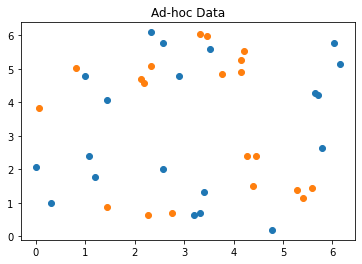

100


In [3]:
feature_dim = 2
sample_total, training_input, test_input, class_labels = ad_hoc_data(
    training_size=20,
    test_size=10,
    n=feature_dim,
    gap=0.3,
    plot_data=True
)
print(len(sample_total))

In [4]:
print(len(training_input))
print(len(test_input))
print(len(class_labels))

2
2
2


In [5]:
print(len(training_input['A']))

20


In [6]:
print(training_input)

{'A': array([[3.20442451, 0.62831853],
       [0.31415927, 1.00530965],
       [3.39292007, 1.31946891],
       [6.1575216 , 5.15221195],
       [1.0681415 , 2.38761042],
       [2.89026524, 4.77522083],
       [0.        , 2.07345115],
       [4.77522083, 0.18849556],
       [6.03185789, 5.78053048],
       [1.44513262, 4.08407045],
       [5.65486678, 4.27256601],
       [2.57610598, 2.0106193 ],
       [2.57610598, 5.78053048],
       [3.33008821, 0.69115038],
       [1.19380521, 1.75929189],
       [5.71769863, 4.20973416],
       [1.00530965, 4.77522083],
       [2.32477856, 6.09468975],
       [3.51858377, 5.59203492],
       [5.78053048, 2.63893783]]), 'B': array([[4.1469023 , 5.27787566],
       [0.81681409, 5.02654825],
       [0.06283185, 3.83274304],
       [5.40353936, 1.13097336],
       [4.20973416, 5.52920307],
       [5.27787566, 1.38230077],
       [4.46106157, 2.38761042],
       [4.27256601, 2.38761042],
       [2.32477856, 5.0893801 ],
       [1.44513262, 0.87964594

In [7]:
def calculate_theta(x1, x2):
    import math
    theta_div_2 = math.acos(x1) 
    y = x2 / (math.sin(theta_div_2))
    theta = theta_div_2 * 2
    print(theta, y)

In [8]:
calculate_theta(0.04915399331228671, 0.19061386643181888)

3.04324503662745 0.19084455706394762


In [9]:
# Sampling

In [10]:

from sklearn import preprocessing
import pandas as pd

def normalize(data):
    
    
    scaler = preprocessing.MinMaxScaler()
    names = ['x1','x2']
    training_df = pd.DataFrame(data)
    #print(training_df)
    
    d = preprocessing.normalize(training_df, axis=0)
    scaled_df = pd.DataFrame(d, columns=names)
    scaled_df = scaled_df.values.tolist()
    print(scaled_df)
    return scaled_df

training_A = normalize(training_input['A'])
training_B = normalize(training_input['B'])

[[0.19385890328358588, 0.03703602097358165], [0.019005774831724106, 0.05925763355773065], [0.20526236818262034, 0.07777564404452147], [0.37251318670179245, 0.3036953719833695], [0.06461963442786198, 0.14073687969961027], [0.17485312845186177, 0.28147375939922054], [0.0, 0.12221886921281946], [0.2888877774422064, 0.011110806292074496], [0.36491087676910283, 0.34073139295695115], [0.08742656422593088, 0.24073413632828072], [0.3421039469710339, 0.2518449426203553], [0.15584735362013766, 0.1185152671154613], [0.15584735362013766, 0.34073139295695115], [0.20146121321627555, 0.04073962307093981], [0.0722219443605516, 0.10370085872602863], [0.3459051019373787, 0.24814134052299708], [0.060818479461517146, 0.28147375939922054], [0.1406427337547584, 0.359249403443742], [0.21286467811530999, 0.3296205866648767], [0.34970625690372353, 0.15555128808904295]]
[[0.2544982941923395, 0.3009457803063396], [0.0501284518863699, 0.2866150288631806], [0.0038560347604899925, 0.21854395950817518], [0.331618989

In [11]:
import math
import random
def generate_vector(theta, y=1):
    return math.cos(theta/2), math.sin(theta/2)

training_lst = []
#thetas = []
for i in range(40):
    theta = random.uniform(0,math.pi)
    x1,x2 = generate_vector(theta)
    training_lst.append([x1, x2])
    #thetas.append(theta)
print(training_lst)
#print(thetas)

[[0.20401540788378075, 0.9789676773755172], [0.2577323200216535, 0.9662163583878385], [0.4278053452598863, 0.9038708904301928], [0.9385133150385143, 0.34524304119767335], [0.984471833729083, 0.17554261190405246], [0.2449039682628913, 0.9695473409427148], [0.6141462010868718, 0.7891922729541665], [0.9826010047926028, 0.18572901060568675], [0.6643116230101441, 0.7474557294807687], [0.06490679764610972, 0.9978913305662731], [0.41584560950008514, 0.9094352253236635], [0.9081896898052044, 0.4185588218297716], [0.9227781997631002, 0.3853315378242118], [0.017957878832101426, 0.9998387442922242], [0.9982210530493847, 0.05962155020609206], [0.9148492306079073, 0.40379559836149764], [0.7526322567932578, 0.6584411029350214], [0.9675299523702638, 0.2527563871920846], [0.8332917501096165, 0.5528334823427868], [0.8785207989574345, 0.47770409857901663], [0.522315061122408, 0.8527525883424191], [0.6101740928424577, 0.7922673642299572], [0.8115754594933777, 0.5842476132155894], [0.9862146289978706, 0.1

In [12]:
import matplotlib.pyplot as plt
# draw the data points
def draw_plot(data,color):
    x = []
    y = []
    for vec in data:
        x.append(vec[0])
        y.append(vec[1])
    #print(x,y)
    plt.plot(x,y,color)

# draw two sets of data points in one graph
def draw_plot2(data1,data2,color1,color2):
    x1 = []
    y1 = []
    for vec in data1:
        x1.append(vec[0])
        y1.append(vec[1])
    x2 = []
    y2 = []
    for vec in data2:
        x2.append(vec[0])
        y2.append(vec[1])
    plt.plot(x1,y1,color1,x2,y2,color2)

In [13]:
# split training data with two labels
training_A = []
training_B = []
for i in range(len(training_lst)):
    if i%2==0:
        training_A.append(training_lst[i])
    else:
        training_B.append(training_lst[i])
        
#print(len(training_A),len(training_B))
#print(len(training_lst))

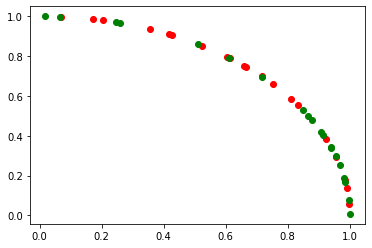

In [14]:
draw_plot2(training_A,training_B,'ro','go')

In [15]:
def sampling(training):
    lst = []
    for i in range(len(training)):
        lst.append((training[i],1))
    print(lst)
    return lst
sampleA = sampling(training_A)
sampleB = sampling(training_B)

[([0.20401540788378075, 0.9789676773755172], 1), ([0.4278053452598863, 0.9038708904301928], 1), ([0.984471833729083, 0.17554261190405246], 1), ([0.6141462010868718, 0.7891922729541665], 1), ([0.6643116230101441, 0.7474557294807687], 1), ([0.41584560950008514, 0.9094352253236635], 1), ([0.9227781997631002, 0.3853315378242118], 1), ([0.9982210530493847, 0.05962155020609206], 1), ([0.7526322567932578, 0.6584411029350214], 1), ([0.8332917501096165, 0.5528334823427868], 1), ([0.522315061122408, 0.8527525883424191], 1), ([0.8115754594933777, 0.5842476132155894], 1), ([0.6045415076433036, 0.7965736410002289], 1), ([0.17127716386276112, 0.9852228850057884], 1), ([0.9553545900791158, 0.2954616848506156], 1), ([0.06817387006054981, 0.9976734553153989], 1), ([0.9906684411035185, 0.1362939463128298], 1), ([0.7165902095958088, 0.6974944240002459], 1), ([0.3544107801078377, 0.9350898346914878], 1), ([0.6606021949827062, 0.7507361320624115], 1)]
[([0.2577323200216535, 0.9662163583878385], 1), ([0.938

In [16]:
from qiskit import QuantumCircuit
def construct_U(rotation_angle):
    qc = QuantumCircuit(5,5)
# qc.h(0)
# qc.x(0)
# qc.cry(theta1,0,1)
# qc.x(0)
# qc.cry(theta2,0,1)


# qc.measure(0,0)


    for i in range(5):
        qc.h(i)
        
    # U
    for i in range(4):
        qc.cnot(i,i+1)
        qc.rz(rotation_angle, i +1)
        qc.cnot(i,i+1)
        
    qc.cnot(4,0)
    qc.rz(rotation_angle,0)
    qc.cnot(4,0)
    
    for i in range(5):
        qc.h(i)

        
    # U
    for i in range(4):
        qc.cnot(i,i+1)
        qc.rz(rotation_angle,i+1)
        qc.cnot(i,i+1)
        
    qc.cnot(4,0)
    qc.rz(rotation_angle,0)
    qc.cnot(4,0)
    
    return qc
    


In [17]:
def swap_neighbor(qc, num):
    for i in range(num-1):
        qc.swap(i, i+1)
    qc.swap(num-1,0)
    return qc

def theta_column(qc, num, theta_lst):
    theta1, theta2, theta3, theta4, theta5 = theta_lst
    qc.ry(theta1,0)
    qc.ry(theta2,1)
    qc.ry(theta3,2)
    qc.ry(theta4,3)
    qc.ry(theta5,4)
    return qc 

def construct_W(qc, num,theta_lst):
    qc = swap_neighbor(qc, num)
    qc = theta_column(qc,num,theta_lst)
    return qc


def construct_circuit(theta_lst, rotation_angle):
    
    qc = construct_U(rotation_angle)
    qc = theta_column(qc, 5,theta_lst)

    l = 4
    for i in range(l+1):
        qc = construct_W(qc, 5,theta_lst)
    return qc


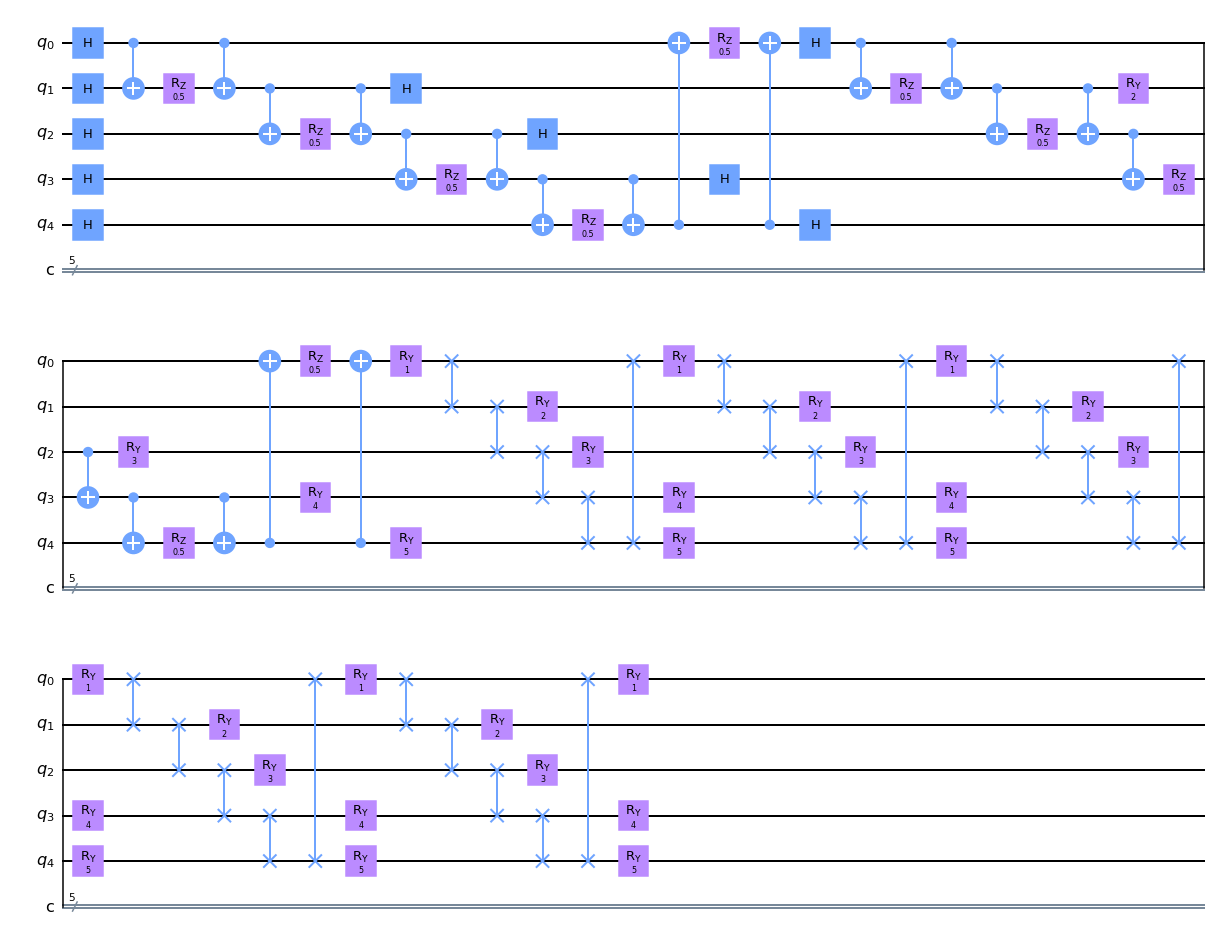

In [18]:
theta_lst = [1,2,3,4,5]
qc = construct_circuit(theta_lst, 0.5)
qc.draw()

In [23]:
# Quantum variational training

samples = [[0.969673606056397, 0], [0.9768384647995416, 0],[0.46100121231613834, 1],[0.26100121231613834, 1], [0.16100121231613834, 1], [0.9995168681898496, 0]]
theta = [0.1,0.2,0.3,0.4,0.5]
R = 20

import math
from qiskit import algorithms
def measureall(qc, num):
    for i in range(num):
        qc.measure(i,i)
    return qc


def my_measure(qc):
    simulator = Aer.get_backend('aer_simulator')
    circ = transpile(qc, simulator)

    # Run and get counts
    result = simulator.run(circ).result()
    counts = result.get_counts(circ)
    #plot_histogram(counts, title='Bell-State counts')
    return counts

def argmax(dct):
    max_value = -1
    max_x = -1
    for x,prob in dct.items():
        if prob > max_value:
            max_x = x
            max_value = prob
    
    # turn into 1 0
    count1 = 0
    count0 = 0
    for num in max_x:
        if num == 1:
            count1 = count1 + 1
        else:
            count0 = count0 + 1
    if count1>count0:
        return 1, max_value
    
    return 0, max_value

def sigmoid(x):
    return 1/(1+1/(math.e)**x)
    
    
def calculate_Pr(R, py,yb):
    a = math.sqrt(R) * (1.0/2.0 - (py + yb/2.0))
    b = math.sqrt(2 * (1.0 - py) * py)
    #print(a,b)
    if b == 0:
        return 1
    return sigmoid(a/b)

def cost_function(input_value):
    simulator = Aer.get_backend('aer_simulator')
    losses = []
    for i in range(len(samples)):
        # U and W
        qc = construct_circuit(theta,samples[i][0])
                
        # Measurement
        qc = measureall(qc,5)
                
        # Record measurement outcome label y
        simulator = Aer.get_backend('aer_simulator')
        circ = transpile(qc, simulator)

        # Run and get counts
        result = simulator.run(circ).result()
        counts = result.get_counts(circ) # counts is ry
        plot_histogram(counts, title='Bell-State counts')
            
            
        # empirical distribution
        py_dct = {}
        #print(counts)
        total_count = 0
        for value in counts.values():
            total_count = total_count + value
        for k,v in counts.items():
            py_dct[k] = v/total_count
        #print("py is",py_dct)
            
            
        x, py = argmax(py_dct)
        
        # Evaluate Pr
        yi = samples[i][1]
        #print(py,yi)
        Pr = calculate_Pr(R, py, yi) # b = 1
        
        losses.append(Pr)
    return np.average(losses)  

In [27]:
# Using Optimizer
optimizer = algorithms.optimizers.SPSA() 
init_params = [1.0,2.0,3.0,4.0,5.0]
init_loss = cost_function(init_params)
print("Initial Loss: {}".format(init_loss))
res = optimizer.optimize(num_vars=16, objective_function=cost_function, initial_point=init_params)
print(res)

Initial Loss: 0.5174530352339695
(array([ 4.18755664, -1.62470593, -0.76525006,  6.10923897,  8.31747566]), 0.5153233730567033, 200)


In [28]:
def quantum_variational_classification(testX, theta, R):
    # Calibrate the quantum hardware to generate short depth trial circuits
    
    # Set the counter to be 0
    ry_1 = 0
    ry_0 = 0
    
    ry = {}
    for i in range(R):
        # Draw circuit U and W
        qc = construct_circuit(theta, testX)
        # Measurement
        qc = measureall(qc,5)
        # Record measurements
        counts = my_measure(qc)
        
        max_count = 0
        
        # get the most likely measurement
        max_y = ""
        for label,count in counts.items():
            if max_count < count:
                max_count = count
                max_y = label
        
        if max_y == '0':
            ry_0 = ry_0 +1
        else:
            ry_1 = ry_1 + 1
    
    # Set label = argmax{py(s)}
    if ry_0 > ry_1:
        return 0
    return 1
            
    


# A test
quantum_variational_classification(0.8462894157706925, [4.18755664, -1.62470593, -0.76525006,  6.10923897,  8.31747566], 20)

1

In [29]:
quantum_variational_classification(0.2462894157706925, [4.18755664, -1.62470593, -0.76525006,  6.10923897,  8.31747566], 20)

1

In [ ]:
# Code that is not in use

In [ ]:

def f(a):
    return np.sum(a**2 + 4*a**2 + 1)


In [ ]:
def f(x):
    
    return np.sum(x[0]*2)
my_optimizer = algorithms.optimizers.SPSA() 
arr = np.array([0.1,0.2,0.3])
result = my_optimizer.optimize(3, f, initial_point = arr)
print(result)

In [ ]:
# Previous wrong code
def quantum_variational_training(samples, R, init_theta,f_routine = construct_circuit):
    '''
    samples: [(x,y)]
    x: a normalised number
    '''
    # Calibrate the quantum hardware to generate short depth trial circuits
    
    # set initial value to W
    
    i = 0
    theta = init_theta
    total_Pr = 0
    while i < 10:
        Remp = 0
        for j in range(len(samples)):
            
            # U and W
            qc = f_routine(theta,samples[j][0])
                
            # Measurement
            qc = measureall(qc,5)
                
            # Record measurement outcome label y
            simulator = Aer.get_backend('aer_simulator')
            circ = transpile(qc, simulator)

            # Run and get counts
            result = simulator.run(circ).result()
            counts = result.get_counts(circ) # counts is ry
            plot_histogram(counts, title='Bell-State counts')
            
            
            # empirical distribution
            py_dct = {}
            #print(counts)
            total_count = 0
            for value in counts.values():
                total_count = total_count + value
            for k,v in counts.items():
                py_dct[k] = v/total_count
            #print("py is",py_dct)
            
            
            x, py = argmax(py_dct)
            
            # Evaluate Pr
            yi = samples[j][1]
            #print(py,yi)
            Pr = calculate_Pr(R, py, yi) # b = 1
            total_Pr = total_Pr + Pr
            # Add Pr to cost function Remp
            Remp = Remp + 1 / len(samples) * Pr
        
        # Use optimization routine to propose new theta
        # 单目标优化
        # ???????
        def cost_function(input_value):
            return np.sum(input_value**2 + 4*input_value**2 + 1)
            
        my_optimizer = algorithms.optimizers.SPSA() 
        arr = np.array(theta)
        # cost_function
        #print(arr)
        result = my_optimizer.optimize(5, objective_function = cost_function, initial_point = arr, variable_bounds=[-1.0,+1.0])
        #print(result)
        theta = list(result[0])
        
        i = i + 1
    
    
    return theta, Remp
#print(sampleA)
sample = [[0.969673606056397, 0], [0.9768384647995416, 1], [0.16100121231613834, 1], [0.9995168681898496, 0]]
quantum_variational_training(sample, 2, theta_lst)
    

In [16]:
#pip install pennylane-qiskit
#pip install tensornetwork==0.3
#pip install pennylane
#pip install noisyopt

In [8]:
import pennylane as qml
import numpy as np

num_wires = 4
num_layers = 5

dev_sampler_spsa = qml.device("qiskit.ibmq", wires=num_wires, shots=1000)

In [10]:
np.random.seed(50)

all_pauliz_tensor_prod = qml.operation.Tensor(*[qml.PauliZ(i) for i in range(num_wires)])


def circuit(params):
    qml.templates.StronglyEntanglingLayers(params, wires=list(range(num_wires)))
    return qml.expval(all_pauliz_tensor_prod)

In [11]:
flat_shape = num_layers * num_wires * 3
init_params = qml.init.strong_ent_layers_normal(
    n_wires=num_wires, n_layers=num_layers
)
init_params_spsa = init_params.reshape(flat_shape)

qnode_spsa = qml.QNode(circuit, dev_sampler_spsa)


def cost_spsa(params):
    return qnode_spsa(params.reshape(num_layers, num_wires, 3))

In [19]:
print(init_params)
print(init_params_spsa)

[[[-0.15603521 -0.00309776 -0.06209284]
  [-0.14645805  0.14119461 -0.04767321]
  [-0.07804692  0.10702677 -0.12822926]
  [-0.13274789  0.01263376  0.08621937]]

 [[ 0.0696737  -0.03345652 -0.09975261]
  [ 0.15989083  0.33140753  0.09877705]
  [ 0.01238663  0.07427854 -0.03939559]
  [ 0.01481158 -0.04122345 -0.01607151]]

 [[ 0.01395315  0.02854694 -0.0281262 ]
  [ 0.17109073 -0.01497666  0.06903067]
  [ 0.10952095  0.13384087 -0.13689817]
  [ 0.04864276  0.07535217  0.03634646]]

 [[-0.03147105  0.13732812 -0.06244172]
  [ 0.0375754  -0.02004163  0.07430381]
  [ 0.0857362  -0.15061893 -0.16663522]
  [-0.02189948 -0.03588584  0.03785277]]

 [[ 0.06842154 -0.11678561 -0.07932166]
  [-0.00388354  0.2705255  -0.14913885]
  [ 0.00959779  0.05246867  0.08156655]
  [ 0.00515058 -0.01645554  0.02781994]]]
[-0.15603521 -0.00309776 -0.06209284 -0.14645805  0.14119461 -0.04767321
 -0.07804692  0.10702677 -0.12822926 -0.13274789  0.01263376  0.08621937
  0.0696737  -0.03345652 -0.09975261  0.1598

In [17]:
from noisyopt import minimizeSPSA

niter_spsa = 200

# Evaluate the initial cost
cost_store_spsa = [cost_spsa(init_params_spsa)]
device_execs_spsa = [0]


def callback_fn(xk):
    cost_val = cost_spsa(xk)
    cost_store_spsa.append(cost_val)

    # We've evaluated the cost function, let's make up for that
    num_executions = int(dev_sampler_spsa.num_executions / 2)
    device_execs_spsa.append(num_executions)

    iteration_num = len(cost_store_spsa)
    if iteration_num % 10 == 0:
        print(
            f"Iteration = {iteration_num}, "
            f"Number of device executions = {num_executions}, "
            f"Cost = {cost_val}"
        )


In [18]:
res = minimizeSPSA(
    cost_spsa,
    x0=init_params_spsa.copy(),
    niter=niter_spsa,
    paired=False,
    c=0.15,
    a=0.2,
    callback=callback_fn,
)

Iteration = 10, Number of device executions = 14, Cost = 0.216
Iteration = 20, Number of device executions = 29, Cost = -0.592
Iteration = 30, Number of device executions = 44, Cost = -0.868
Iteration = 40, Number of device executions = 59, Cost = -0.948
Iteration = 50, Number of device executions = 74, Cost = -0.96
Iteration = 60, Number of device executions = 89, Cost = -0.962
Iteration = 70, Number of device executions = 104, Cost = -0.966
Iteration = 80, Number of device executions = 119, Cost = -0.974
Iteration = 90, Number of device executions = 134, Cost = -0.964
Iteration = 100, Number of device executions = 149, Cost = -0.976
Iteration = 110, Number of device executions = 164, Cost = -0.98
Iteration = 120, Number of device executions = 179, Cost = -0.974
Iteration = 130, Number of device executions = 194, Cost = -0.972
Iteration = 140, Number of device executions = 209, Cost = -0.972
Iteration = 150, Number of device executions = 224, Cost = -0.988
Iteration = 160, Number of d

(array([0.47930878, 0.80787442, 0.77311751, 1.05409786, 1.78181869]), 33.83054404746255, 200)
